In [11]:
import pandas as pd  # Import the pandas library for data manipulation and analysis


In [21]:
df = pd.read_csv ('train.csv') # Load the dataset into a pandas dataframe
df.info() # Display information about the dataframe, including data types and non-null counts
df.isnull().sum() # Check for missing values in each column of the dataframe


df.head(10) # Display the first 10 rows of the dataframe
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns # Select columns with numeric data types
print("colunas numericas: \n", colunas_numericas)

colunas_categoricas = df.select_dtypes(include=['object']).columns # Select columns with categorical data types
print("\ncolunas categoricas: \n", colunas_categoricas)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

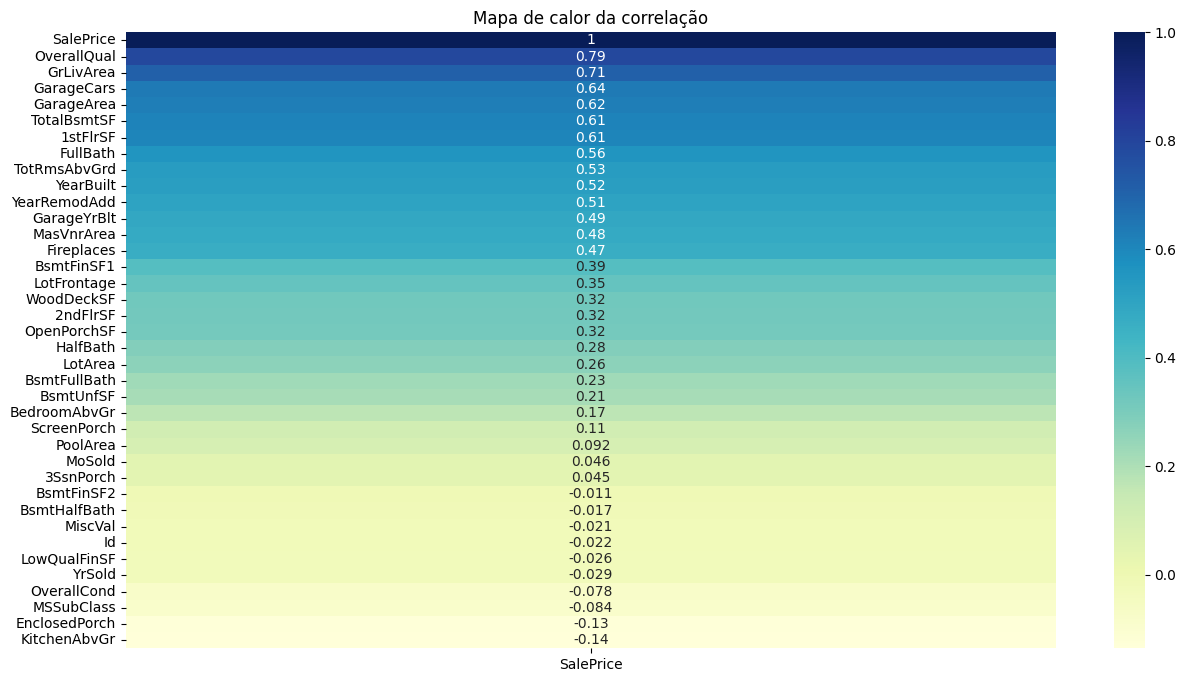

In [13]:
import seaborn as sns # Import the seaborn library for data visualization
import matplotlib.pyplot as plt # Import the matplotlib library for plotting
import pandas as pd 


df.dtypes [df.dtypes == 'object'] # Display the data types of columns that are of type 'object' (categorical)
df_numerico = df.select_dtypes(include=['int64', 'float64']) # Create a new dataframe with only numeric columns

correlacao = df_numerico.corr() # Calculate the correlation matrix for the numeric columns in the dataframe

plt.figure(figsize=(15, 8)) # Set the figure size for the plot
sns.heatmap(correlacao [['SalePrice']].sort_values(by='SalePrice', ascending=False), annot=True, cmap='YlGnBu') # Create a heatmap to visualize the correlation between 'SalePrice' and other numeric columns
plt.title('Mapa de calor da correlação') # Set the title of the heatmap
plt.show() # Display the heatmap


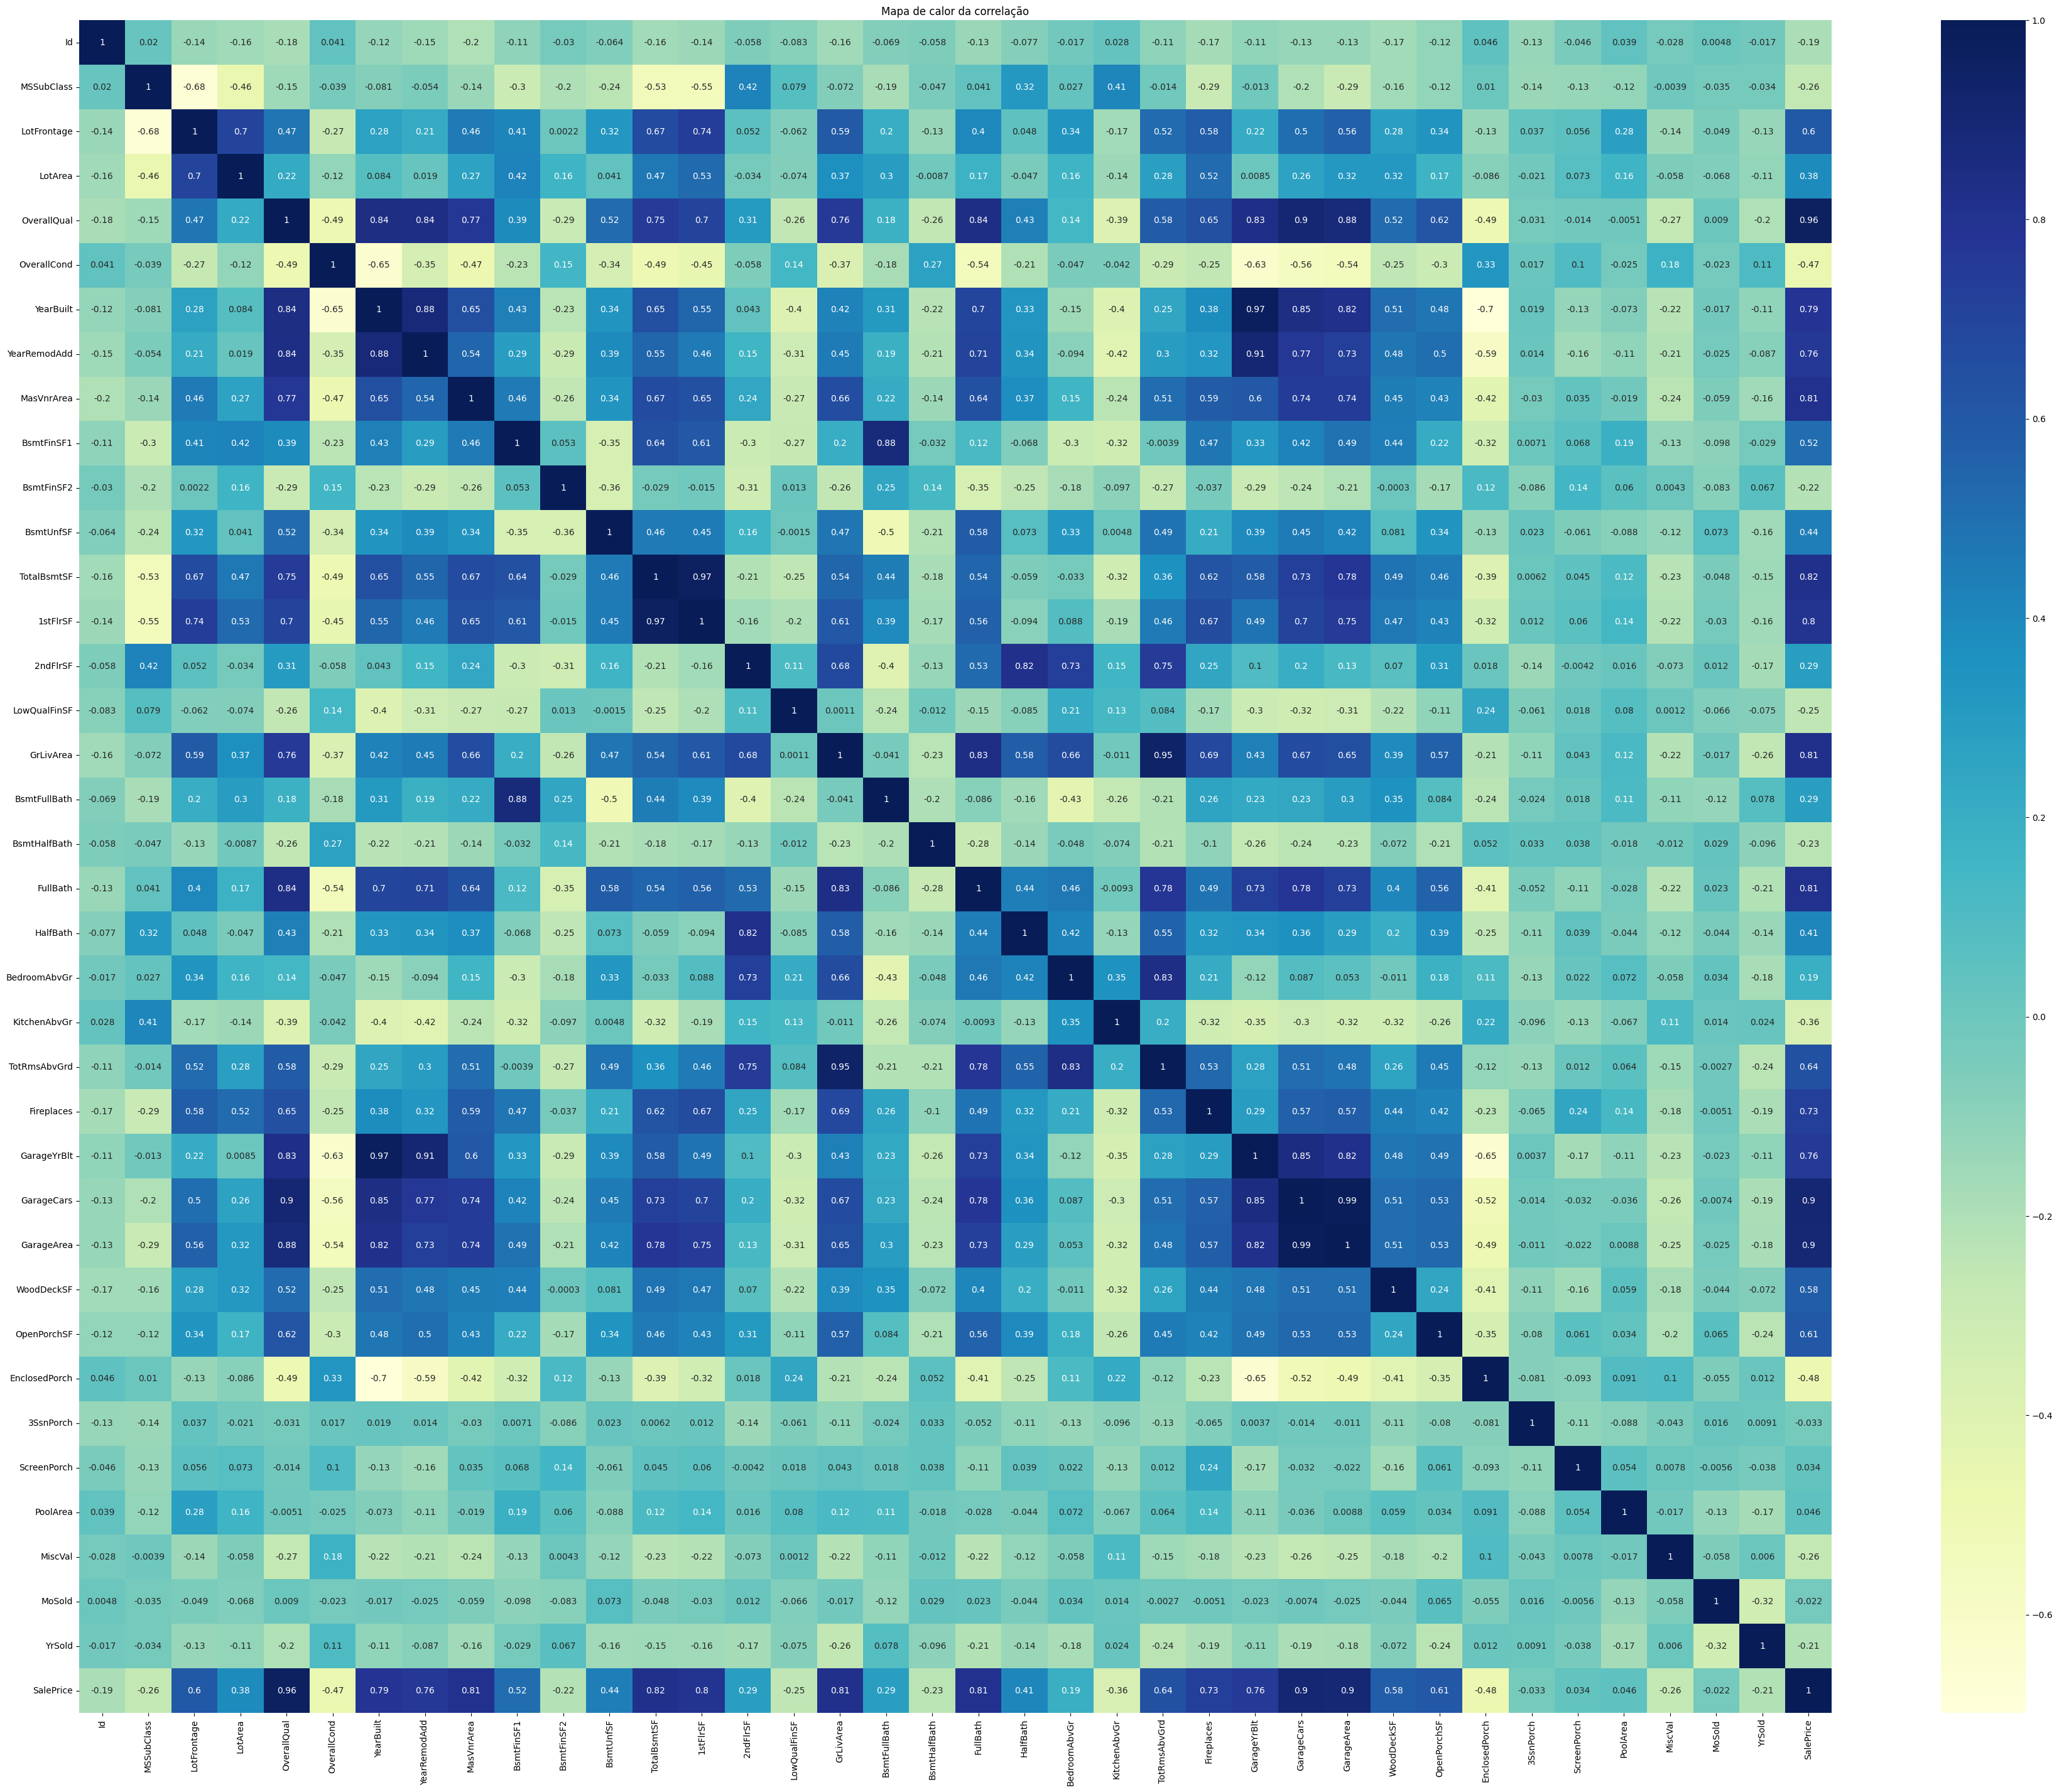

In [19]:
import seaborn as sns # Import the seaborn library for data visualization
import matplotlib.pyplot as plt # Import the matplotlib library for plotting
import pandas as pd 


df.dtypes [df.dtypes == 'object'] # Display the data types of columns that are of type 'object' (categorical)
df_numerico = df.select_dtypes(include=['int64', 'float64']) # Create a new dataframe with only numeric columns

correlacao = df_numerico.corr() # Calculate the correlation matrix for the numeric columns in the dataframe

plt.figure(figsize=(45, 35)) # Set the figure size for the plot
sns.heatmap( correlacao.corr (),  annot=True, cmap='YlGnBu') # Create a heatmap to visualize the correlation between 'SalePrice' and other numeric columns
plt.title('Mapa de calor da correlação') # Set the title of the heatmap
plt.show() # Display the heatmap


In [22]:
valores_nnulos = df.isnull().sum().sort_values(ascending=False) # Check for missing values in the dataframe and sort them in descending order
valores_nnulos = valores_nnulos[valores_nnulos > 0] # Filter the dataframe to keep only columns with missing values
print(valores_nnulos) # Display the columns with missing values and their countsq

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64


In [23]:
df['PoolQC'].fillna('No Pool', inplace=True) # Fill missing values in the 'poolQC' column with 'No Pool'
df['MiscFeature'].fillna('None', inplace=True) # Fill missing values in the 'MiscFeature' column with None
df['Alley'].fillna('No Alley', inplace=True) # Fill missing values in the 'Alley' column with 'No Alley'
df['Fence'].fillna('No Fence', inplace=True) # Fill missing values in the 'Fence' column with 'No Fence'
df['MasVnrType'].fillna('none', inplace=True) # Fill missing values in the 'MasVnrType' column with 'none'
df['FireplaceQu'].fillna('No Fireplace', inplace=True) # Fill missing values in the 'FireplaceQu' column with 'No Fireplace'

df['GarageQual'].fillna('No Garage', inplace=True) # Fill missing values in the 'GarageQual' column with 'No Garage'
df['GarageFinish'].fillna('No Garage', inplace=True) # Fill missing values in the 'GarageFinish' column with 'No Garage'
df['GarageType'].fillna('No garage',inplace=True) # Fill missing values in the 'GarageType' column with 'No garage'
df['GarageCond'].fillna('No Garage', inplace=True) # Fill missing values in the 'GarageCond' column with 'No Garage'


df['BsmtFinType2'].fillna('No Basement', inplace=True) # Fill missing values in the 'BsmtFinType2' column with 'No Basement'
df['BsmtExposure'].fillna('No Basement', inplace=True) # Fill missing values in the 'BsmtExposure' column with 'No Basement'
df['BsmtCond'].fillna('No Basement', inplace=True) # Fill missing values in the 'BsmtCond' column with 'No Basement'    
df['BsmtQual'].fillna('No Basement', inplace=True) # Fill missing values in the 'BsmtQual' column with 'No Basement'
df['BsmtFinType1'].fillna('No Basement', inplace=True) # Fill missing values in the 'BsmtFinType1' column with 'No Basement'


C:\Users\Gustavo_\AppData\Local\Temp\ipykernel_25500\1313285629.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PoolQC'].fillna('No Pool', inplace=True) # Fill missing values in the 'poolQC' column with 'No Pool'
C:\Users\Gustavo_\AppData\Local\Temp\ipykernel_25500\1313285629.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on 

In [ ]:

# ===========================================================================================================================================================

df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True) # Fill missing values in the 'LotFrontage' column with the mean of that column
df['MasVnrArea'].fillna(0, inplace=True) # Fill missing values in the 'MasVnrArea' column with 0
df['GarageYrBlt'].fillna(0, inplace=True) # Fill missing values in the 'GarageYrBlt' column with 0
df['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True) # Fill missing values in the 'Electrical' column with the mode of that column

# ===========================================================================================================================================================

C:\Users\Gustavo_\AppData\Local\Temp\ipykernel_25500\1230260469.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['LotFrontage'].fillna(df['LotFrontage'].mean(), inplace=True) # Fill missing values in the 'LotFrontage' column with the mean of that column
C:\Users\Gustavo_\AppData\Local\Temp\ipykernel_25500\1230260469.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never w

In [25]:
print(df.isnull().sum().sum())

0


In [ ]:
import matplotlib.pyplot as plt # Import the matplotlib library for plotting
import seaborn as sns # Import the seaborn library for data visualization

variaveis_importantes  = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'LotFrontage']  # List of important variables to analyze

plt.figure(figsize=(15, 8)) # Set the figure size for the plot
for i, coluna in enumerate(variaveis_importantes ,1): # Loop through the important variables and their indices
    plt.subplot (2, 3, i) # Create a subplot for each variable
    sns.boxplot(x=df[coluna])
    plt.title(f'boxplot de {coluna}')   # Set the title of the boxplot
plt.tight_layout() # Adjust the layout of the subplots
plt.show() # Display the boxplots


In [ ]:
outliers= df [(df ['GrLivArea'] > 4000) & (df ['SalePrice'] < 300000)] # Identify outliers based on the 'GrLivArea' and 'SalePrice' columns
print ("Outliers: \n") # Display the identified outliers
display(outliers) # Display the outliers in a more readable format

plt.figure(figsize=(15, 8)) # Set the figure size for the plot
sns.scatterplot(data=df, x = 'GrLivArea', y='SalePrice', color = 'blue', label = 'Normal') # Plot the normal data points
sns.scatterplot(data=outliers, x = 'GrLivArea', y='SalePrice', color = 'red', label = 'Outliers') # Plot the outliers in a different color
plt.title('GrLivArea vs SalePrice') # Set the title of the scatter plot
plt.show() # Display the scatter plot
 


**Aqui eu quis ver os outliers em todas as colunas influentes para ver o quanto outliers estao sendo relevantes**

In [ ]:
import seaborn as sns  # Import the seaborn library for data visualization
import matplotlib.pyplot as plt  # Import the matplotlib library for plotting

# Lista das colunas que queremos analisar
colunas1 = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'LotFrontage', 
            'OverallQual', 'GarageCars', 'FullBath', 'YearBuilt', 'TotRmsAbvGrd']

# Definindo o tamanho da figura e a quantidade de linhas e colunas
plt.figure(figsize=(15, 20)) 

# Loop para criar os subplots
for i, coluna in enumerate(colunas1, 1):
    plt.subplot(5, 2, i)  # Organiza em 5 linhas e 2 colunas
    
    # Gráfico de dispersão dos dados normais
    sns.scatterplot(data=df, x=coluna, y='SalePrice', color='blue', label='Normal')
    
    # Identificação dos outliers com base no 95º percentil
    outliers_coluna = df[(df[coluna] > df[coluna].quantile(0.95)) & (df['SalePrice'] < 300000)]
    
    # Gráfico de dispersão dos outliers
    sns.scatterplot(data=outliers_coluna, x=coluna, y='SalePrice', color='red', label='Outliers')
    
    # Título para cada gráfico
    plt.title(f'Outliers em {coluna}')

# Ajusta o layout para não sobrepor os gráficos
plt.tight_layout()
plt.show()
display(outliers) # Display the outliers in a more readable format



**Agora quero testar diferentes percentis para ver a diferenca de um para o outro para sabermos com qual vamos trabalhar**


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

percentis = [0.90, 0.95, 0.99] # Define the percentiles to be used for outlier detection
coluna2 = 'GrLivArea' # Define the column to be analyzed for outliers

plt.figure(figsize=(15, 8)) # Set the figure size for the plot

for i, perc in enumerate(percentis, 1): # Loop through the percentiles and their indices
    plt.subplot(1, len(percentis), i) # Create a subplot for each percentile
    outliers = df[df[coluna] > df[coluna].quantile(perc)] # Identify outliers based on the specified percentile
    sns.scatterplot(data=df, x=coluna2, y='SalePrice', color='blue', label='Normal') # Plot the normal data points
    sns.scatterplot(data=outliers, x=coluna2, y='SalePrice', color='red', label='Outliers') # Plot the outliers in a different color
    plt.title(f'Outliers em {coluna2} - Percentil {perc}') # Set the title of the scatter plot
plt.tight_layout() # Adjust the layout of the subplots
plt.show() # Display the scatter plot

display(outliers) # Display the outliers in a more readable format


**Pude observar que 0.95 e um otimo meio termo para continuar para a remocao dos mesmos outliers**

In [ ]:
colunas_categoricas = df.select_dtypes(include=['object']).columns # Select columns with categorical data types
print("\ncolunas categoricas: \n", colunas_categoricas) # Display the categorical columns
# Loop through each categorical column

In [ ]:
valores_nulos_categoricos = df[colunas_categoricas].isnull().sum() # Check for missing values in the categorical columns
print(valores_nulos_categoricos) # Display the missing values in the categorical columns

In [ ]:
for coluna in colunas_categoricas:
    print(f"\nDistribuição de {coluna}:") # Print the distribution of each categorical column
    display(pd.DataFrame(df[coluna].value_counts()).reset_index().rename(columns={'index': coluna, coluna: 'Contagem'})) # Display the value counts of each categorical column in a readable format
display(df.head(25))

In [ ]:
from sklearn.preprocessing import LabelEncoder # Import the LabelEncoder class from sklearn for encoding categorical variables


# Identificando quais colunas são categóricas
colunas_categoricas = df.select_dtypes(['object']).columns # Select columns with categorical data types


# Aplicando Label Encoding para cada coluna categórica
for coluna in colunas_categoricas:
    if df[coluna].nunique() <= 10: # Check if the number of unique values is less than or equal to 10
        le = LabelEncoder()
        df[coluna]=le.fit_transform(df[coluna]) # Apply label encoding to the categorical column
        print(f"Coluna {coluna} transformada com Label Encoding")
    else:
        df = pd.get_dummies(df, columns=[coluna], drop_first=True) # Apply one-hot encoding to the categorical column
        print(f"Coluna {coluna} transformada com One-Hot Encoding")
display(df.head(25))




**⚠️ Ponto de Atenção:
Se você usar LabelEncoder para coisas que não têm uma ordem clara (ex.: Cores, Tipos de Casa, Bairros), o modelo pode entender que "2" é maior que "1", e "1" é maior que "0", o que não é verdade nesse caso.
Já com o One-Hot, isso não acontece, porque cada categoria é independenteeeeeeeee.**

In [ ]:
from sklearn.model_selection import train_test_split # Import the train_test_split function from sklearn for splitting the dataset

x= df.drop(columns=['SalePrice'], axis=1) # Drop the 'SalePrice' column from the dataframe to create the feature set
y= df['SalePrice'] # Set the target variable to 'SalePrice'

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) # Split the dataset into training and testing sets
print(f"Tamanho do conjunto de treino: {x_train.shape[0]} amostras")
print(f"Tamanho do teste: {x_test.shape[0]} amostras")

In [ ]:
from sklearn.linear_model import LinearRegression  # Importa o modelo de Regressão Linear
from sklearn.ensemble import RandomForestRegressor  # Importa o modelo de Random Forest para regressão
from sklearn.model_selection import train_test_split  # Importa a função para dividir o dataset
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Importa métricas para avaliação

modelos = {
    'Regressao Linear': LinearRegression(), # Define a dictionary of models to be used
    'Random Forest': RandomForestRegressor(random_state=42 ), # Add Random Forest model
}

for nome, modelo in modelos.items (): # Loop through each model in the dictionary
    modelo.fit(x_train, y_train) # Fit the model to the training data
    y_pred = modelo.predict(x_test) # Make predictions on the test data

    mae = mean_absolute_error (y_test, y_pred) # Calculate the mean absolute error
    rmse = np.sqrt(mean_squared_error(y_test, y_pred)) # Calculate the root mean squared error
    r2 = r2_score (y_test, y_pred) # Calculate the R-squared score

    print(f"\nModelo: {nome}") # Print the name of the model
    print(f"- MAE (Erro Médio Absoluto): ${mae:.2f}") # Print the mean absolute error
    print(f"- RMSE (Erro Quadrático Médio): ${rmse:.2f}") # Print the root mean squared error
    print(f"- R² (Explicação da Variância): {r2:.4f}") # Print the R-squared score
      


In [ ]:
# Interações entre features importantes
df['Qual_x_Area'] = df['OverallQual'] * df['GrLivArea']  # Qualidade x Área
df['Garage_x_Bsmt'] = df['GarageCars'] * df['TotalBsmtSF']  # Garagem + Porão

# Área total da casa (já existente, mas crucial)
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

# Idade da casa ajustada por reformas
df['EffectiveAge'] = df['YrSold'] - df['YearRemodAdd']  # Idade pós-reforma

# Densidade de cômodos
df['RoomDensity'] = df['TotRmsAbvGrd'] / df['GrLivArea']

In [ ]:
# Exemplo para GrLivArea
plt.figure(figsize=(10,6))
sns.boxplot(x=df['GrLivArea'])
plt.title('Distribuição de GrLivArea')
plt.show()



In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(
    n_estimators=1200,  # Mais iterações
    learning_rate=0.05,  # Taxa de aprendizado reduzida
    max_depth=5,
    subsample=0.8,  # Previne overfitting
    colsample_bytree=0.8,  # Similar ao max_features
    random_state=42
)

xgb.fit(x_train, y_train)
y_pred_xgb = xgb.predict(x_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"RMSE XGBoost: {rmse_xgb:.2f}")

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'learning_rate': [0.01, 0.05],  # Taxas menores para ajuste fino
    'max_depth': [4, 5, 6],          # Testar profundidades
    'subsample': [0.8, 0.9],         # Controle de overfitting
    'colsample_bytree': [0.8, 0.9],  #% de features por árvore
    'n_estimators': [800, 1000, 1200]      # Mais árvores com learning_rate baixo
}

busca_xgb = GridSearchCV(
    XGBRegressor(random_state=42),
    param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2
)

busca_xgb.fit(x_train, y_train)
print(f"Melhor RMSE: {-busca_xgb.best_score_:.2f}")